In [3]:
import torch
import os
from tqdm import tqdm
from collections import defaultdict

directory = "/srv/flash1/pputta7/projects/lm-nav/data/datasets/lmnav/offline_1env_karmesh+clip"

In [17]:
def load_data(directory):
    data = defaultdict(lambda: [].copy())
    filenames = os.listdir(directory) 
    for filename in tqdm(filenames):
        item = torch.load(os.path.join(directory, filename))
        del item['rgbs']
        del item['imagegoal']
        data[item['episode_id']].append(item)
    return data

In [18]:
data = load_data(directory)

100%|██████████████████████████████████████████████████████████████████████████████████████████████| 35608/35608 [22:11<00:00, 26.74it/s]


In [24]:
# map into episode ids
mapped_episodes = data

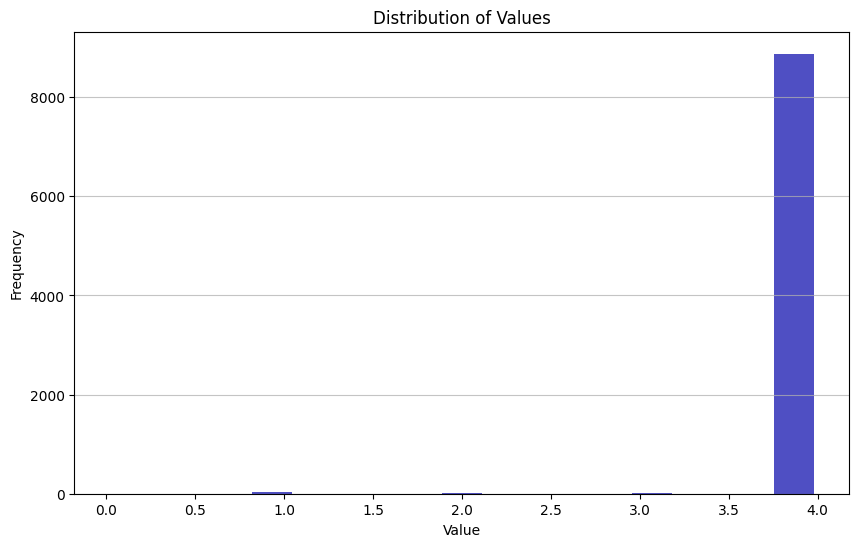

In [25]:
# find number of paths for each episode
from matplotlib import pyplot as plt
counts = {k: len(v) for k, v in mapped_episodes.items()}
values = list(counts.values())

# Create a histogram to show the distribution of values
plt.figure(figsize=(10, 6))  # Optional: Adjusts the size of the plot
plt.hist(values, bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85)
plt.title('Distribution of Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

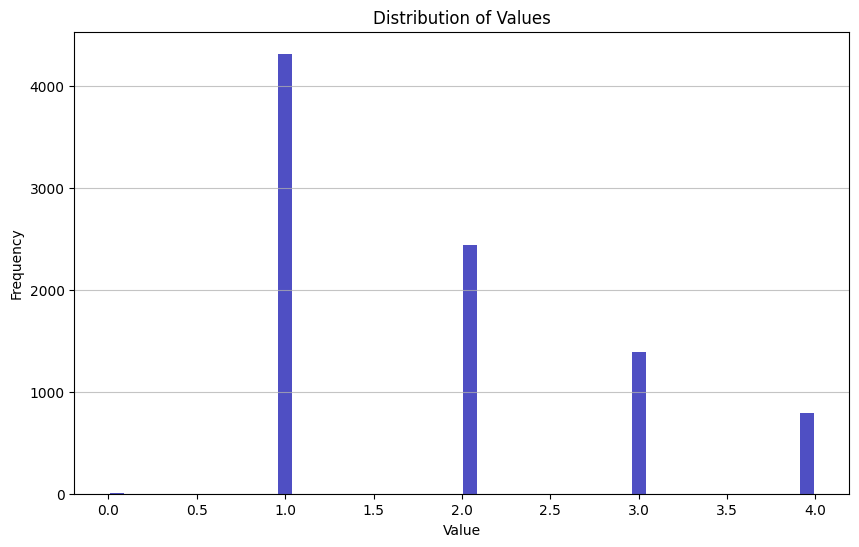

In [33]:
# count number of unique episode ids with contrasting room labels
room_labels_mapping = {k: [x['room_labels'] for x in v if 'room_labels' in x.keys()] for k, v in mapped_episodes.items()}
room_labels_mapping = {k: set([';'.join(x) for x in v]) for k, v in room_labels_mapping.items()}
episodes_diversity = {k: len(v) for k, v in room_labels_mapping.items()}
values = episodes_diversity.values()
# Create a histogram to show the distribution of values
plt.figure(figsize=(10, 6))  # Optional: Adjusts the size of the plot
plt.hist(values, bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85)
plt.title('Distribution of Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [40]:
room_labels_mapping

{6811: {'laundry room;hallway;living room;bedroom',
  'laundry room;hallway;office room;hallway;living room;bedroom',
  'laundry room;hallway;office room;hallway;living room;hallway;office room;hallway;living room;bedroom'},
 1697: {'office room'},
 3489: {'bedroom 2',
  'bedroom 2;hallway;bedroom 1;hallway;bedroom 2',
  'bedroom 2;hallway;bedroom 1;hallway;entrance;hallway;bedroom 1;hallway;bedroom 2',
  'bedroom 2;hallway;bedroom 2'},
 6833: {'kitchen;entrance;kitchen;hallway', 'kitchen;hallway'},
 3166: {'bathroom 2;hallway;bedroom 1;hallway;bedroom 2',
  'bathroom 2;hallway;bedroom 2'},
 6001: {'bedroom;living room;hallway;office room'},
 5552: {'living room', 'living room;kitchen;entrance;living room'},
 8410: {'bedroom 2;hallway;bedroom 1'},
 2983: {'living room;entrance;kitchen', 'living room;kitchen'},
 4275: {'office room;hallway;living room;hallway;office room',
  'office room;hallway;living room;hallway;office room;hallway;living room;hallway;living room;hallway;office room'

In [39]:
num_room_labels = sum({k: sum([1 for x in v if 'coords' in x.keys()]) for k, v in mapped_episodes.items()}.values())
num_room_labels

35608

In [35]:
mapped_episodes[0]

[{'coords': [[-3.271271228790283, 0.19160032272338867, -3.646127700805664],
   [-3.511141300201416, 0.19160032272338867, -3.575244903564453],
   [-3.75954270362854, 0.19160032272338867, -3.547018527984619],
   [-4.007944107055664, 0.19160032272338867, -3.518792152404785],
   [-4.256345748901367, 0.19160032272338867, -3.490565776824951],
   [-4.50474739074707, 0.19160032272338867, -3.462339401245117],
   [-4.50474739074707, 0.19160032272338867, -3.462339401245117],
   [-4.50474739074707, 0.19160032272338867, -3.462339401245117],
   [-4.50474739074707, 0.19160032272338867, -3.462339401245117],
   [-4.50474739074707, 0.19160032272338867, -3.462339401245117],
   [-4.50474739074707, 0.19160032272338867, -3.462339401245117],
   [-4.50474739074707, 0.19160032272338867, -3.462339401245117],
   [-4.256345748901367, 0.19160032272338867, -3.490565776824951],
   [-4.007944107055664, 0.19160032272338867, -3.518792152404785],
   [-3.75954270362854, 0.19160032272338867, -3.547018527984619],
   [-3.51